<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.108413,-52.511532,-1.403118,58.832396,-60.235515
1,0.0,1.0,23.945779,43.900480,77.846258,38.928207,38.918051
2,0.0,2.0,55.341962,-69.640241,-4.298280,75.339608,-79.637887
3,0.0,3.0,99.546930,-3.865601,105.681329,126.605867,-20.924538
4,0.0,4.0,91.396268,5.797963,107.194231,117.153219,-9.958988
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.731579,-21.374950,63.356629,90.924235,-27.567605
29996,999.0,26.0,46.121025,-2.519337,53.601688,51.548631,2.053057
29997,999.0,27.0,21.110773,16.854953,47.965726,17.127986,30.837741
29998,999.0,28.0,60.869950,-93.144955,-22.275005,71.847009,-94.122014


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    41.108413 -52.511532   -1.403118   58.832396 -60.235515
      1.0    23.945779  43.900480   77.846258   38.928207  38.918051
      2.0    55.341962 -69.640241   -4.298280   75.339608 -79.637887
      3.0    99.546930  -3.865601  105.681329  126.605867 -20.924538
      4.0    91.396268   5.797963  107.194231  117.153219  -9.958988
...                ...        ...         ...         ...        ...
999.0 25.0   74.731579 -21.374950   63.356629   90.924235 -27.567605
      26.0   46.121025  -2.519337   53.601688   51.548631   2.053057
      27.0   21.110773  16.854953   47.965726   17.127986  30.837741
      28.0   60.869950 -93.144955  -22.275005   71.847009 -94.122014
      29.0   24.947335 -28.390984    6.556351   22.408098 -15.851748

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    41.108413 -52.511532   -1.403118   58.832396 -60.235515
      1.0    23.945779  43.900480   77.846258   38.928207  38.918051
      2.0    55.341962 -69.640241   -4.298280   75.339608 -79.637887
      3.0    99.546930  -3.865601  105.681329  126.605867 -20.924538
      4.0    91.396268   5.797963  107.194231  117.153219  -9.958988
...                ...        ...         ...         ...        ...
999.0 25.0   74.731579 -21.374950   63.356629   90.924235 -27.567605
      26.0   46.121025  -2.519337   53.601688   51.548631   2.053057
      27.0   21.110773  16.854953   47.965726   17.127986  30.837741
      28.0   60.869950 -93.144955  -22.275005   71.847009 -94.122014
      29.0   24.947335 -28.390984    6.556351   22.408098 -15.851748

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,41.108413,-52.511532,-1.403118,58.832396,-60.235515
1,0.0,1.0,23.945779,43.900480,77.846258,38.928207,38.918051
2,0.0,2.0,55.341962,-69.640241,-4.298280,75.339608,-79.637887
3,0.0,3.0,99.546930,-3.865601,105.681329,126.605867,-20.924538
4,0.0,4.0,91.396268,5.797963,107.194231,117.153219,-9.958988
...,...,...,...,...,...,...,...
29995,999.0,25.0,74.731579,-21.374950,63.356629,90.924235,-27.567605
29996,999.0,26.0,46.121025,-2.519337,53.601688,51.548631,2.053057
29997,999.0,27.0,21.110773,16.854953,47.965726,17.127986,30.837741
29998,999.0,28.0,60.869950,-93.144955,-22.275005,71.847009,-94.122014


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    41.108413 -52.511532   -1.403118   58.832396 -60.235515
      1.0    23.945779  43.900480   77.846258   38.928207  38.918051
      2.0    55.341962 -69.640241   -4.298280   75.339608 -79.637887
      3.0    99.546930  -3.865601  105.681329  126.605867 -20.924538
      4.0    91.396268   5.797963  107.194231  117.153219  -9.958988
...                ...        ...         ...         ...        ...
999.0 25.0   74.731579 -21.374950   63.356629   90.924235 -27.567605
      26.0   46.121025  -2.519337   53.601688   51.548631   2.053057
      27.0   21.110773  16.854953   47.965726   17.127986  30.837741
      28.0   60.869950 -93.144955  -22.275005   71.847009 -94.122014
      29.0   24.947335 -28.390984    6.556351   22.408098 -15.851748

[30000 rows x 5 columns]

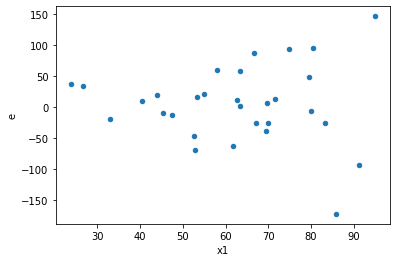

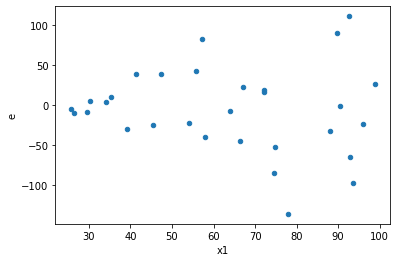

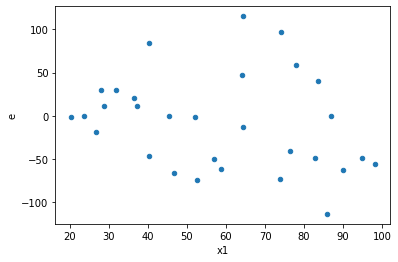

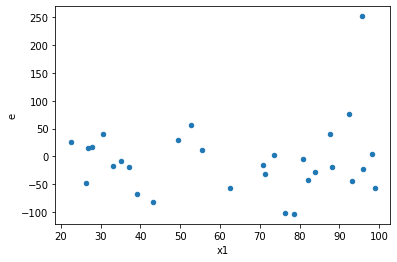

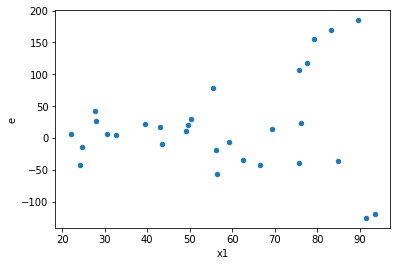

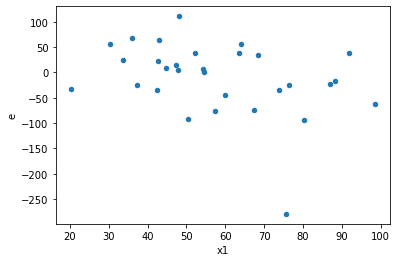

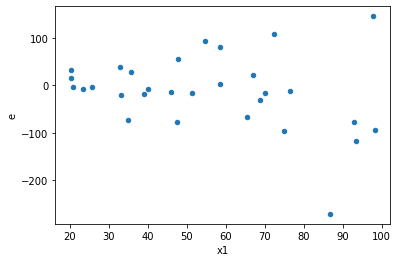

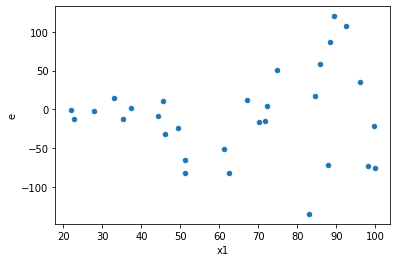

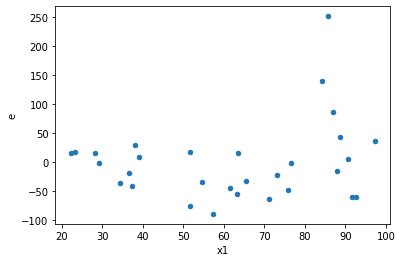

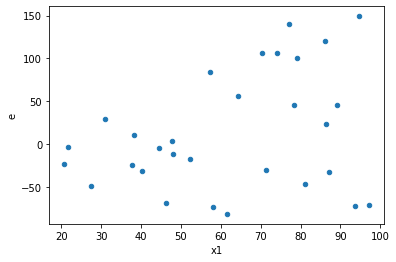

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,13.0,14027.814898837425,37573.49053099341,935.187659922495,2890.2685023841086,3.0905759627149525,0.04764582695920594,0.976177086520397,0.02382291347960297,Reject005=0 : Heteroscedasticity
1.0,17.0,11.0,31539.580909935143,93745.92022226949,1855.2694652903026,8522.35638384268,4.593594916148285,0.013698929212751176,0.9931505353936244,0.006849464606375588,Reject005=0 : Heteroscedasticity
2.0,18.0,10.0,27374.90729132778,46857.14403472036,1520.8281828515435,4685.714403472036,3.081028124220022,0.07336246052638762,0.9633187697368062,0.03668123026319381,Reject005=1 : Homoscedasticity
3.0,15.0,13.0,37490.037834211485,59777.2621923765,2499.335855614099,4598.250937875115,1.8397891293986588,0.2763510239706404,0.8618244880146798,0.1381755119853202,Reject005=1 : Homoscedasticity
8.0,15.0,13.0,35040.29553502648,47398.6721282523,2336.019702335099,3646.051702173254,1.5607966399121718,0.4262089396009381,0.786895530199531,0.21310446980046904,Reject005=1 : Homoscedasticity
10.0,11.0,17.0,13975.193585745972,98410.20265511824,1270.4721441587246,5788.835450301072,4.556444214000691,0.005389581903014529,0.9973052090484927,0.0026947909515072643,Reject005=0 : Heteroscedasticity
11.0,13.0,15.0,14176.884722426961,62844.88137780345,1090.529594032843,4189.658758520231,3.8418570036477635,0.015008600035761432,0.9924956999821193,0.007504300017880716,Reject005=0 : Heteroscedasticity
15.0,17.0,11.0,43050.00170510748,88250.49844004115,2532.3530414769107,8022.772585458286,3.1681098385789332,0.05672747561903768,0.9716362621904812,0.02836373780951884,Reject005=1 : Homoscedasticity
17.0,13.0,15.0,6567.873299343903,75876.31294495793,505.22102302645413,5058.420862997195,10.012292902412197,7.381456769084416e-05,0.9999630927161546,3.690728384542208e-05,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,13.0,14027.814898837425,37573.49053099341,935.187659922495,2890.2685023841086,3.0905759627149525,0.04764582695920594,Reject005=0 : Heteroscedasticity
1.0,17.0,11.0,31539.580909935143,93745.92022226949,1855.2694652903026,8522.35638384268,4.593594916148285,0.013698929212751176,Reject005=0 : Heteroscedasticity
2.0,18.0,10.0,27374.90729132778,46857.14403472036,1520.8281828515435,4685.714403472036,3.081028124220022,0.07336246052638762,Reject005=1 : Homoscedasticity
3.0,15.0,13.0,37490.037834211485,59777.2621923765,2499.335855614099,4598.250937875115,1.8397891293986588,0.2763510239706404,Reject005=1 : Homoscedasticity
4.0,13.0,15.0,170047.77624645308,13719.181968989742,13080.598172804082,914.6121312659828,0.06992127723696583,2.128064650775988e-05,Reject005=0 : Heteroscedasticity
5.0,15.0,13.0,69038.70463784778,22932.42032378625,4602.580309189852,1764.0323325989423,0.3832702992877158,0.07871015359545776,Reject005=1 : Homoscedasticity
6.0,17.0,11.0,167704.3936817877,10016.53172907288,9864.964334222806,910.59379355208,0.09230583737572322,2.4440854525049594e-05,Reject005=0 : Heteroscedasticity
7.0,16.0,12.0,143134.6189771379,23082.705103919532,8945.913686071119,1923.558758659961,0.2150209387393221,0.00522770529606618,Reject005=0 : Heteroscedasticity
8.0,15.0,13.0,35040.29553502648,47398.6721282523,2336.019702335099,3646.051702173254,1.5607966399121718,0.4262089396009381,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    639
Reject005=1 : Homoscedasticity      361
Name: Result_test, dtype: int64